<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%915_%D0%9A%D0%A2%D0%9E%D0%92%D0%94_%D0%92%D0%BB%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна 5

Завдання 1

If you haven't uploaded results.csv yet, choose the file now (click the button).


Saving results.csv to results.csv
Uploaded: results.csv
Loading dataset...
Columns in dataset: ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']
Dataset preview:
After cleaning — sample:
Matches played (total) for selected teams:
- Germany: 1010
- Ukraine: 320
Matches in Kyiv: 97
Matches in London: 428
Top-10 teams by goals scored at home:
     home_team  home_goals
0       Brazil        1484
1      Germany        1337
2    Argentina        1321
3      England        1230
4       Sweden        1207
5       Mexico        1179
6      Hungary        1118
7  South Korea        1099
8  Netherlands        1091
9       France        1080


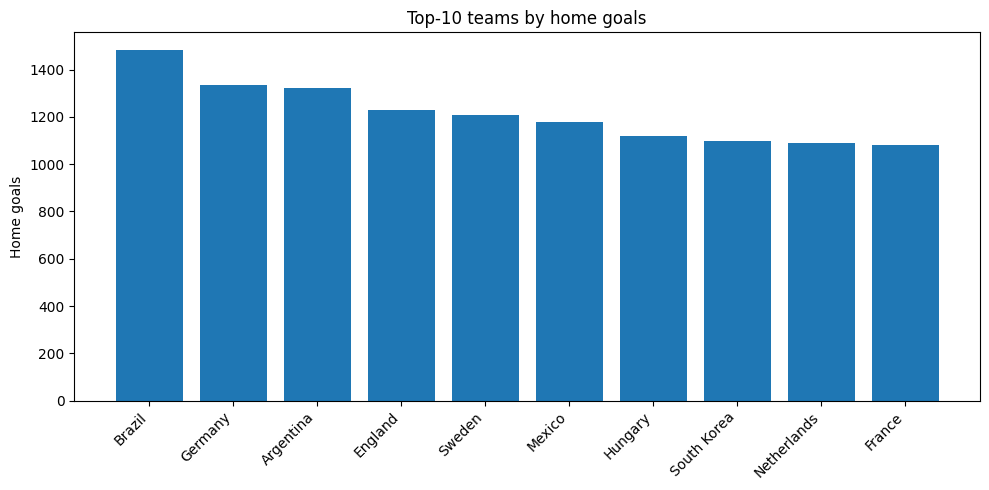

Top-10 teams by total goals (home + away):
          team  total_goals
0      England       2338.0
1       Brazil       2270.0
2      Germany       2257.0
3       Sweden       2117.0
4      Hungary       1984.0
5    Argentina       1981.0
6  Netherlands       1773.0
7  South Korea       1764.0
8       Mexico       1726.0
9       France       1649.0


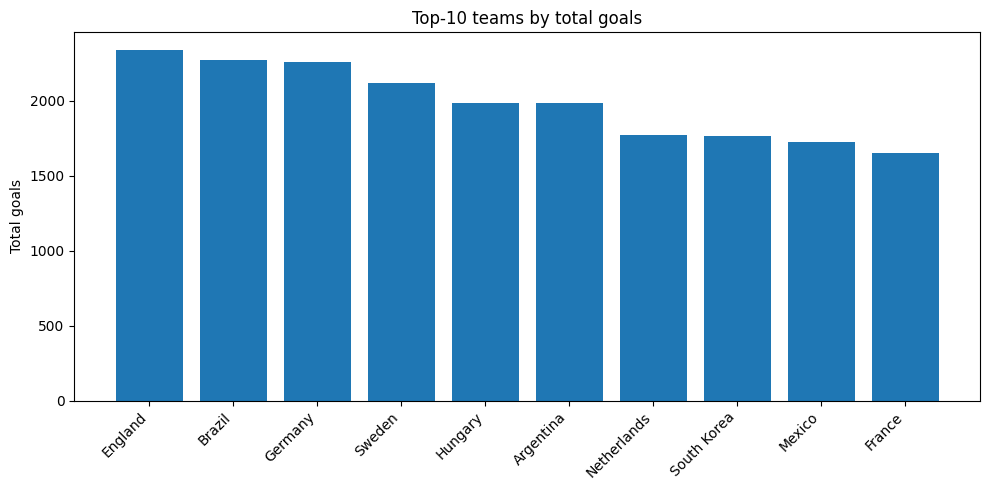

Top-10 teams by average goals per match:
                 team  matches_played  total_goals  avg_goals_per_match
0         Elba Island             1.0          5.0             5.000000
1           Yorkshire             7.0         27.0             3.857143
2  Parishes of Jersey             3.0         11.0             3.666667
3            Cascadia             7.0         23.0             3.285714
4           Occitania            33.0        103.0             3.121212
5               Sápmi            29.0         90.0             3.103448
6         Isle of Man            53.0        163.0             3.075472
7             Silesia             8.0         24.0             3.000000
8            Asturias             1.0          3.0             3.000000
9              Surrey             1.0          3.0             3.000000


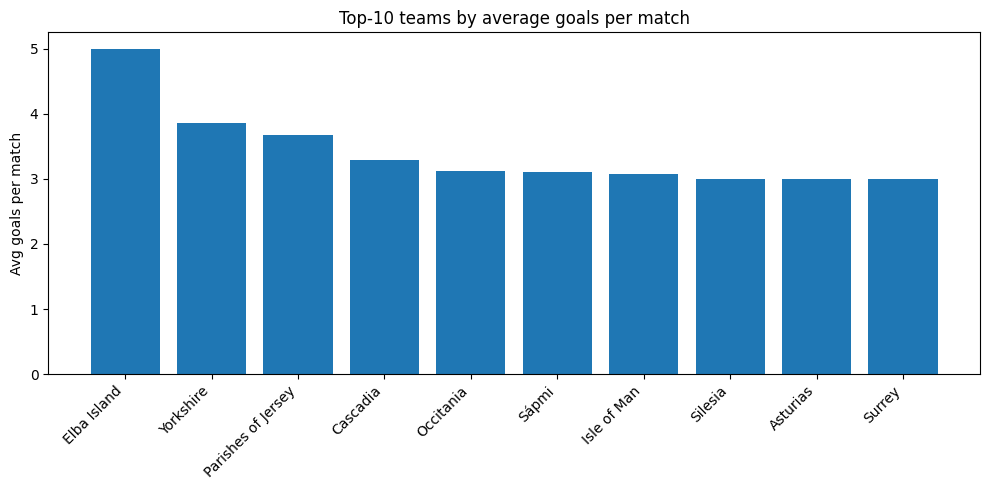

Saved CSV outputs to /content/results_analysis


In [3]:

# --- Cell 1: Install / Imports ---
# (No extra packages required beyond pandas and matplotlib which are available in Colab)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Cell 2: Upload results.csv (choose one method) ---
# Option A: Upload file interactively (recommended for one-off runs)
from google.colab import files
print("If you haven't uploaded results.csv yet, choose the file now (click the button).")
uploaded = files.upload()
# After upload, determine filename
if len(uploaded) > 0:
    csv_filename = list(uploaded.keys())[0]
    print(f"Uploaded: {csv_filename}")
else:
    csv_filename = 'results.csv'  # fallback, if file already present in environment
    print(f"No upload detected. Will attempt to read '{csv_filename}' from the environment.")


# --- Cell 3: Load the dataset ---
# Use parse_dates for the 'date' column
print('Loading dataset...')
df = pd.read_csv(csv_filename, parse_dates=['date'], dayfirst=False, low_memory=False)
print('Columns in dataset:', list(df.columns))
print('Dataset preview:')
df.head()


# --- Cell 4: Basic cleaning and normalization ---
# Strip whitespace from string columns we will use
for col in ['home_team','away_team','tournament','city','country']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Normalize common city spellings for Kyiv/Kiev
if 'city' in df.columns:
    df['city_norm'] = df['city'].str.replace('Kiev','Kyiv', regex=False).str.replace('kiev','Kyiv', regex=False)
else:
    df['city_norm'] = np.nan

# Ensure numeric scores
for s in ['home_score','away_score']:
    if s in df.columns:
        df[s] = pd.to_numeric(df[s], errors='coerce')

print('After cleaning — sample:')
df[['date','home_team','away_team','home_score','away_score','city_norm']].head()


# --- Cell 5: Question 1 — How many matches played by Germany and Ukraine (total) ---
def matches_count_for_team(team_name):
    return ((df['home_team'] == team_name) | (df['away_team'] == team_name)).sum()

teams_of_interest = ['Germany','Ukraine']
counts = {t: matches_count_for_team(t) for t in teams_of_interest}
print('Matches played (total) for selected teams:')
for t,c in counts.items():
    print(f"- {t}: {c}")


# --- Cell 6: Question 2 — How many matches in Kyiv, London ---
kyiv_count = ((df['city_norm'] == 'Kyiv') | (df['city_norm'] == 'KYIV')).sum()
london_count = (df['city'].str.lower() == 'london').sum() if 'city' in df.columns else 0
print(f"Matches in Kyiv: {kyiv_count}")
print(f"Matches in London: {london_count}")


# --- Cell 7: Question 3 — Top-10 teams by home goals ---
home_goals = df.groupby('home_team', dropna=False)['home_score'].sum().reset_index().rename(columns={'home_score':'home_goals'})
top10_home_goals = home_goals.sort_values(by='home_goals', ascending=False).head(10).reset_index(drop=True)
print('Top-10 teams by goals scored at home:')
print(top10_home_goals)

# Optional: bar plot
plt.figure(figsize=(10,5))
plt.bar(top10_home_goals['home_team'], top10_home_goals['home_goals'])
plt.xticks(rotation=45, ha='right')
plt.title('Top-10 teams by home goals')
plt.ylabel('Home goals')
plt.tight_layout()
plt.show()


# --- Cell 8: Question 4 — Top-10 teams by total goals (home + away) ---
home_goals_all = df.groupby('home_team')['home_score'].sum().reset_index().rename(columns={'home_team':'team','home_score':'home_goals'})
away_goals_all = df.groupby('away_team')['away_score'].sum().reset_index().rename(columns={'away_team':'team','away_score':'away_goals'})
total_goals = pd.merge(home_goals_all, away_goals_all, on='team', how='outer').fillna(0)
total_goals['total_goals'] = total_goals['home_goals'] + total_goals['away_goals']
top10_total_goals = total_goals.sort_values(by='total_goals', ascending=False).head(10).reset_index(drop=True)
print('Top-10 teams by total goals (home + away):')
print(top10_total_goals[['team','total_goals']])

plt.figure(figsize=(10,5))
plt.bar(top10_total_goals['team'], top10_total_goals['total_goals'])
plt.xticks(rotation=45, ha='right')
plt.title('Top-10 teams by total goals')
plt.ylabel('Total goals')
plt.tight_layout()
plt.show()


# --- Cell 9: Question 5 — Average goals per match for each team (top-10) ---
# Matches played per team
home_matches = df.groupby('home_team').size().reset_index(name='home_matches').rename(columns={'home_team':'team'})
away_matches = df.groupby('away_team').size().reset_index(name='away_matches').rename(columns={'away_team':'team'})
matches = pd.merge(home_matches, away_matches, on='team', how='outer').fillna(0)
matches['matches_played'] = matches['home_matches'] + matches['away_matches']

# Reuse total_goals from earlier (ensure every team appears)
goals_matches = pd.merge(total_goals[['team','total_goals']], matches[['team','matches_played']], on='team', how='left').fillna(0)
# Avoid division by zero
goals_matches['avg_goals_per_match'] = goals_matches.apply(lambda r: r['total_goals'] / r['matches_played'] if r['matches_played']>0 else 0, axis=1)

top10_avg = goals_matches[goals_matches['matches_played']>0].sort_values(by='avg_goals_per_match', ascending=False).head(10).reset_index(drop=True)
print('Top-10 teams by average goals per match:')
print(top10_avg[['team','matches_played','total_goals','avg_goals_per_match']])

plt.figure(figsize=(10,5))
plt.bar(top10_avg['team'], top10_avg['avg_goals_per_match'])
plt.xticks(rotation=45, ha='right')
plt.title('Top-10 teams by average goals per match')
plt.ylabel('Avg goals per match')
plt.tight_layout()
plt.show()


# --- Cell 10: Save outputs to CSV files for later use ---
output_dir = Path('/content/results_analysis')
output_dir.mkdir(exist_ok=True)

pd.DataFrame.from_dict(counts, orient='index', columns=['matches_played']).reset_index().rename(columns={'index':'team'}).to_csv(output_dir/'team_counts.csv', index=False)
pd.DataFrame({'city':['Kyiv','London'],'matches_played':[kyiv_count,london_count]}).to_csv(output_dir/'city_counts.csv', index=False)
top10_home_goals.to_csv(output_dir/'top10_home_goals.csv', index=False)
top10_total_goals[['team','total_goals']].to_csv(output_dir/'top10_total_goals.csv', index=False)
top10_avg.to_csv(output_dir/'top10_avg_goals_per_match.csv', index=False)

print(f"Saved CSV outputs to {output_dir}")


Завдання 2

In [4]:

# --- Cell 1: Імпорт бібліотек ---
import pandas as pd
from pathlib import Path


# --- Cell 2: Створення DataFrame ---
# Employees DataFrame
employees = pd.DataFrame({
    'employee_id': [1, 2, 3, 4],
    'name': ['John', 'Alice', 'Bob', 'Charlie'],
    'department': ['IT', 'HR', 'IT', 'Sales']
})

# Projects DataFrame
projects = pd.DataFrame({
    'project_id': [101, 102, 103, 104],
    'project_name': ['Alpha', 'Beta', 'Gamma', 'Delta'],
    'employee_id': [1, 2, 3, None]  # Delta без призначеного працівника
})

print('Employees DataFrame:')
print(employees)
print('\nProjects DataFrame:')
print(projects)


# --- Cell 3: Типи з’єднань (Join) ---

# Inner Join — лише працівники, які залучені до будь-якого проекту
inner_join = pd.merge(employees, projects, on='employee_id', how='inner')

# Left Join — усі працівники, навіть без проектів
left_join = pd.merge(employees, projects, on='employee_id', how='left')

# Right Join — усі проекти, навіть без працівників
right_join = pd.merge(employees, projects, on='employee_id', how='right')

# Full Outer Join — усі працівники та всі проекти, незалежно від відповідності
full_outer_join = pd.merge(employees, projects, on='employee_id', how='outer')

# Cross Join — декартовий добуток (усі комбінації працівник–проект)
cross_join = employees.merge(projects, how='cross')

print('Inner Join (усі залучені працівники):')
print(inner_join)

# --- Cell 4: Фільтри та агрегування ---

# Для Inner Join: фільтр лише для працівників з відділу IT
inner_join_it = inner_join[inner_join['department'] == 'IT']
print('Inner Join (відділ IT):')
print(inner_join_it)

# Для Left Join: підрахунок кількості працівників у кожному відділі
employee_count_by_department = left_join.groupby('department')['employee_id'].nunique().reset_index(name='employee_count')
print('\nКількість працівників у кожному відділі:')
print(employee_count_by_department)


# --- Cell 5: Збереження результатів у Parquet ---
# (Якщо pyarrow відсутній — встановити: !pip install pyarrow)
!pip install pyarrow > /dev/null

output_dir = Path('/content/join_results')
output_dir.mkdir(exist_ok=True)

inner_join.to_parquet(output_dir / 'inner_join.parquet', index=False)
left_join.to_parquet(output_dir / 'left_join.parquet', index=False)
right_join.to_parquet(output_dir / 'right_join.parquet', index=False)
full_outer_join.to_parquet(output_dir / 'full_outer_join.parquet', index=False)
cross_join.to_parquet(output_dir / 'cross_join.parquet', index=False)
inner_join_it.to_parquet(output_dir / 'inner_join_it_only.parquet', index=False)
employee_count_by_department.to_parquet(output_dir / 'employee_count_by_department.parquet', index=False)

print(f' Результати збережено у папці {output_dir}')


Employees DataFrame:
   employee_id     name department
0            1     John         IT
1            2    Alice         HR
2            3      Bob         IT
3            4  Charlie      Sales

Projects DataFrame:
   project_id project_name  employee_id
0         101        Alpha          1.0
1         102         Beta          2.0
2         103        Gamma          3.0
3         104        Delta          NaN
Inner Join (усі залучені працівники):
   employee_id   name department  project_id project_name
0            1   John         IT         101        Alpha
1            2  Alice         HR         102         Beta
2            3    Bob         IT         103        Gamma
Inner Join (відділ IT):
   employee_id  name department  project_id project_name
0            1  John         IT         101        Alpha
2            3   Bob         IT         103        Gamma

Кількість працівників у кожному відділі:
  department  employee_count
0         HR               1
1         IT      

Завдання 3

In [6]:
# %% [markdown]
# #  Лабораторна робота — Завдання 3 (Yelp Dataset, демо-версія)
# У цьому прикладі ми імітуємо роботу з Yelp Dataset, але використовуємо невеликі JSON-приклади.
# Всі завдання виконуються за допомогою SQL-запитів у Spark.

# %% [code]
# === Встановлення та запуск Spark ===
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install pyspark > /dev/null

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Yelp_SQL_Demo").getOrCreate()
print(" SparkSession створено!")

# %% [code]
# === Імітація Yelp Dataset (демо JSON) ===
import json

business_data = [
    {"business_id": "b1", "name": "Pasta Place", "attributes": {"RestaurantsTakeOut": "True"}, "stars": 4.0},
    {"business_id": "b2", "name": "Burger House", "attributes": {"RestaurantsTakeOut": "False"}, "stars": 3.0},
    {"business_id": "b3", "name": "Sushi Spot", "attributes": {"RestaurantsTakeOut": "True"}, "stars": 5.0}
]

review_data = [
    {"review_id": "r1", "user_id": "u1", "business_id": "b1", "stars": 5, "text": "Amazing food and friendly staff"},
    {"review_id": "r2", "user_id": "u2", "business_id": "b1", "stars": 5, "text": "Loved it"},
    {"review_id": "r3", "user_id": "u1", "business_id": "b2", "stars": 3, "text": "Okay food"},
    {"review_id": "r4", "user_id": "u3", "business_id": "b3", "stars": 4, "text": "Fresh sushi and great service"},
    {"review_id": "r5", "user_id": "u2", "business_id": "b3", "stars": 5, "text": "Perfect sushi experience"},
]

user_data = [
    {"user_id": "u1", "name": "Alice"},
    {"user_id": "u2", "name": "Bob"},
    {"user_id": "u3", "name": "Charlie"},
]

photo_data = [
    {"photo_id": "p1", "business_id": "b1", "label": "menu"},
    {"photo_id": "p2", "business_id": "b3", "label": "menu"},
    {"photo_id": "p3", "business_id": "b2", "label": "food"}
]

# Створення DataFrame
business_df = spark.read.json(spark.sparkContext.parallelize(json.dumps(b) for b in business_data))
review_df = spark.read.json(spark.sparkContext.parallelize(json.dumps(r) for r in review_data))
user_df = spark.read.json(spark.sparkContext.parallelize(json.dumps(u) for u in user_data))
photo_df = spark.read.json(spark.sparkContext.parallelize(json.dumps(p) for p in photo_data))

# Реєстрація таблиць
business_df.createOrReplaceTempView("business")
review_df.createOrReplaceTempView("review")
user_df.createOrReplaceTempView("user")
photo_df.createOrReplaceTempView("photo")

print(" Таблиці створені:", spark.catalog.listTables())

# %% [markdown]
# ## 1️ Топ-5 користувачів, які дали найбільше 5-зіркових відгуків

# %% [code]
spark.sql("""
    SELECT user_id, stars, COUNT(*) AS starcount
    FROM review
    GROUP BY user_id, stars
    HAVING stars = 5
    ORDER BY starcount DESC
    LIMIT 5
""").show()

# %% [markdown]
# ## 2️ Відсоток 5-зіркових відгуків для кожного користувача

# %% [code]
spark.sql("""
    SELECT user_id,
           stars,
           COUNT(*) AS starcount,
           SUM(COUNT(*)) OVER (PARTITION BY stars) AS total,
           ROUND(100 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY stars), 2) AS percent
    FROM review
    GROUP BY user_id, stars
    ORDER BY stars, percent DESC
""").show()

# %% [markdown]
# ## 3️ Середня кількість зірок для компаній, які мають `takeout=True` і фото меню

# %% [code]
spark.sql("""
    SELECT b.name,
           AVG(r.stars) AS avg_stars
    FROM business b
    JOIN review r ON b.business_id = r.business_id
    JOIN photo p ON b.business_id = p.business_id
    WHERE b.attributes.RestaurantsTakeOut = 'True' AND p.label = 'menu'
    GROUP BY b.name
    ORDER BY avg_stars DESC
""").show()

# %% [markdown]
# ## 4️ Топ-5 користувачів із найбільшою середньою довжиною слова у відгуках

# %% [code]
spark.sql("""
    SELECT user_id,
           AVG(LENGTH(text) / SIZE(SPLIT(text, ' '))) AS avgW
    FROM review
    GROUP BY user_id
    ORDER BY avgW DESC
    LIMIT 5
""").show()


 SparkSession створено!
 Таблиці створені: [Table(name='business', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='photo', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='review', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='user', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]
+-------+-----+---------+
|user_id|stars|starcount|
+-------+-----+---------+
|     u2|    5|        2|
|     u1|    5|        1|
+-------+-----+---------+

+-------+-----+---------+-----+-------+
|user_id|stars|starcount|total|percent|
+-------+-----+---------+-----+-------+
|     u1|    3|        1|    1|  100.0|
|     u3|    4|        1|    1|  100.0|
|     u2|    5|        2|    3|  66.67|
|     u1|    5|        1|    3|  33.33|
+-------+-----+---------+-----+-------+

+-----------+---------+
|       name|avg_st